# Project 3 - Reddit API and Natural Language Processing

_By: Bryan Ho (DSI 14)_

---


## Problem Statement

In the modern world, people have become more tech and financially savvy to shape their way of life.

Money is always an issue especially among low and middle class citizens. Where should I place my savings? How do I pay off this installment?

Citizens will reach out to internet domains such as reddit to seek advice on financial management. But with everyone's situation being different, which subreddit is right for them? Receiving the wrong advice could lead to even more drastic financial situations for the reader.

We will compare two similar subreddits, r/stocks and r/povertyfinance and compare two classification models, Multinomial Naive Bayes and Logistic Regression, to help direct netizens based on their financial needs.

## Executive Summary

### Contents:
- [Data Import and Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Train/Test Split and Model Validation](#Train/Test-Split-and-Model-Validation)
- [Conclusion](#Conclusion)

---

## Data Import and Cleaning

We'll be importing following libraries for the project:

1. `pandas`
2. `numpy`
3. `matplotlib.pyplot`
4. `seaborn`
5. `metrics` from `sklearn`
6. `train_test_split` and `GridSearchCV` from `sklearn`'s `model_selection` module
7. `LogisticRegression` from `sklearn`'s `linear_model` module
8. `CountVectorizer` from `sklearn`'s `feature_extraction` module
9. `MultinomialNB` from `sklearn`'s `naive_bayes` module
10. `confusion_matrix` from `sklearn`'s `metrics` module
11. `Pipeline` from `sklearn`'s `pipeline` module
12. `KNeighborsClassifier` from `sklearn`'s `neighbors` module
13. `nltk`
14. `word_tokenize` from `nltk`
15. `WordNetLemmatizer` from `sklearn`'s `stem` module
16. `WordCloud` from `wordcloud`
17. `re` from `regex`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import regex as re

pd.set_option('display.max_columns', None)

### Import Data
We will import (based on the process in **`dataextract.ipynb`**) the subreddits r/Stocks and r/PovertyFinance as individual dataframes for our subsequent data analysis

Here are the steps we have performed:
1. **Combine** `selftext` and `title` columns for both datasets (This is because certain subreddit posts only have text in the title and none in the actual post
2. Check for **null values** for the newly created column
3. Obtain a **focused set of columns** from the dataframe (About 10 relevant columns from total 100+ columns)
4. **Remove digits** and symbols from the new column and determine our **stopwords**
5. Combine the two dataframes and remove any rows where **`is_video`** and **`stickied`** column value is **`True`**
6. Create a new column to determine our **`1`** and **`0`** values from the **`subreddit`** column, where **`1`** = **`stocks`** and **`0`** = **`povertyfinance`**

#### Removing null values and selecting relevant columns

In [2]:
stk_df = pd.read_csv('../data/stocks.csv')
pov_df = pd.read_csv('../data/povertyfinance.csv')

In [3]:
stk_df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,link_flair_template_id
0,NaN,stocks,Please use this thread to discuss your portfol...,t2_6l4z3,False,NaN,0,False,Rate My Portfolio - r/Stocks Quarterly Thread ...,[],r/stocks,False,6,NaN,0,False,t3_fbt6pb,False,dark,0.98,NaN,public,315,0,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,315,NaN,True,NaN,False,NaN,[],{},NaN,True,NaN,1.583093e+09,text,6,NaN,NaN,text,self.stocks,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,new,NaN,NaN,False,True,False,False,False,[],[],False,False,False,False,NaN,[],False,NaN,NaN,moderator,t5_2qjfk,NaN,NaN,NaN,fbt6pb,True,NaN,AutoModerator,NaN,2393,False,all_ads,False,[],False,NaN,/r/stocks/comments/fbt6pb/rate_my_portfolio_rs...,all_ads,True,https://www.reddit.com/r/stocks/comments/fbt6p...,639744,1.583065e+09,1,NaN,False,NaN
1,NaN,stocks,"This is the daily discussion, so anything stoc...",t2_6l4z3,False,NaN,0,False,r/Stocks Daily Discussion &amp; Fundamentals F...,[],r/stocks,False,6,NaN,0,False,t3_gfp02m,False,dark,0.78,NaN,public,11,0,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,11,NaN,True,NaN,False,NaN,[],{},NaN,True,NaN,1.588954e+09,text,6,NaN,NaN,text,self.stocks,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,new,NaN,NaN,False,True,False,False,False,[],[],False,False,False,False,NaN,[],False,NaN,NaN,moderator,t5_2qjfk,NaN,NaN,NaN,gfp02m,True,NaN,AutoModerator,NaN,106,False,all_ads,False,[],False,NaN,/r/stocks/comments/gfp02m/rstocks_daily_discus...,all_ads,True,https://www.reddit.com/r/stocks/comments/gfp02...,639744,1.588925e+09,0,NaN,False,NaN
2,NaN,stocks,https://www.cnbc.com/2020/05/08/tesla-secures-...,t2_2sj2vd1h,False,NaN,0,False,Tesla secures $565 million loan for Shanghai f...,[],r/stocks,False,6,NaN,0,False,t3_gg3ut8,False,dark,0.95,NaN,public,316,0,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,316,NaN,False,NaN,False,NaN,[],{},NaN,True,NaN,1.589008e+09,text,6,NaN,NaN,text,self.stocks,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,False,False,False,False,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2qjfk,NaN,NaN,NaN,gg3ut8,True,NaN,coolcomfort123,NaN,99,True,all_ads,False,[],False,NaN,/r/stocks/comments/gg3ut8/tesla_secures_565_mi...,all_ads,False,https://www.reddit.com/r/stocks/comments/gg3ut...,639744,1.588979e+09,0,NaN,False,NaN
3,NaN,stocks,[https://www.cnbc.com/2020/05/08/jobs-report-a...,t2_4mhlzyf1,False,NaN,0,False,A record 20.5 million jobs were lost in April ...,[],r/stocks,False,6,NaN,0,False,t3_gfsdur,False,dark,0.98,NaN,public,1320,0,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,1320,NaN,False,NaN,1588944344.0,NaN,[],{},NaN,True,NaN,1.588970e+09,text,6,NaN,NaN,text,self.stocks

In [4]:
# Both dataframes have about 2480+ rows and 100+ columns

stk_df.shape

(2480, 102)

In [5]:
pov_df.shape

(2489, 110)

In [6]:
# Assess the number of unique values in each dataframe

len(stk_df['name'].unique())

840

In [7]:
len(pov_df['name'].unique())

994

In [8]:
# Remove duplicates based on the column `name`, 
# `name` is a unique identifier for each subreddit post

stk_df.drop_duplicates('name', inplace=True)
pov_df.drop_duplicates('name', inplace=True)

In [9]:
# As the dataframe contains 100+ columns,
# we have selected the following columns for our analysis

focus_columns = ['subreddit', # Name of subreddit
                 'selftext', # Contents of subreddit
                 'title', # Title of subreddit
                 'stickied', # Stickied subreddit posts, these are usually default rules and regulations for the subreddit
                 'num_comments', # Number of comments in a post
                 'is_video', # Determines if the post is a video
                 'name', # Unique post identifier
                 'ups', # Number of upvotes
                 'upvote_ratio'] # Total upvotes / Total votes

In [10]:
# Update the column with only the focus columns

stk_df = stk_df[focus_columns]
pov_df = pov_df[focus_columns]

In [11]:
# Combine selftext and title columns into a new column

stk_df['new_text'] = stk_df['selftext'] + stk_df['title']
stk_df['new_text']

0       Please use this thread to discuss your portfol...
1       This is the daily discussion, so anything stoc...
2       https://www.cnbc.com/2020/05/08/tesla-secures-...
3       [https://www.cnbc.com/2020/05/08/jobs-report-a...
4       I remember in summer/fall 2011 there was so mu...
                              ...                        
835     It's been climbing. Seems bullish, any thought...
836     Hello all,\n\nI am new to the stock market and...
837     Switches are sold out everywhere, and about ev...
838     This company's share price is already up 35% a...
1705    The Fed thing just won’t stock... buying junk ...
Name: new_text, Length: 840, dtype: object

In [12]:
# Check for null values

stk_df.isnull().sum().sort_values(ascending=False)

new_text        0
upvote_ratio    0
ups             0
name            0
is_video        0
num_comments    0
stickied        0
title           0
selftext        0
subreddit       0
dtype: int64

In [13]:
# Change selftext or title null values into blanks to prepare for new column creation

pov_df.replace(np.nan, '', inplace=True)
pov_df['new_text'] = pov_df['selftext'] + pov_df['title']
pov_df['new_text']

0      I'm seeing a *ton* of bad information being po...
1      I know this isn’t a lot savings wise. But I ha...
2      I was able to pay off one of my credit cards t...
3      So, because my student loans are in default, m...
4      Me: it cost $143 to replace the car battery, t...
                             ...                        
989                                    DIY gaming chair?
990    Please reach out to people in need of assistan...
991    In my inbox I have two pending **Issue Identif...
992    I haven’t worked in 3 weeks due to obvious rea...
993    Does anyone know where I can e-file a 1099 for...
Name: new_text, Length: 994, dtype: object

In [14]:
pov_df.isnull().sum().sort_values(ascending=False)

new_text        0
upvote_ratio    0
ups             0
name            0
is_video        0
num_comments    0
stickied        0
title           0
selftext        0
subreddit       0
dtype: int64

In [15]:
# Rename this new column into 'selftext'

stk_df = stk_df.rename(columns={'selftext': 'oldtext', 'new_text': 'selftext'})
pov_df = pov_df.rename(columns={'selftext': 'oldtext', 'new_text': 'selftext'})

#### Determining stopwords and removing digits and symbols

In [16]:
# Determine our stopwords,
# Extract our default stopwords from CountVectorizer 
# and transfer it to a new list to add more stopwords

stop_words = CountVectorizer(stop_words = 'english').get_stop_words()

In [17]:
new_stop_words = []
for word in stop_words:
    new_stop_words.append(word)
new_stop_words[0:5]

['become', 'formerly', 'his', 'herself', 'afterwards']

In [18]:
# Input new stopwords into list
# Words are determined from cut offs from typos and internet lingo
new_stop_words.extend(['www', 
                       'com', 
                       'https',
                       'just',
                       'like',
                      've','don',
                      'amp',
                      'ha',
                      'wa', 'http', 'le', 'u'])

In [19]:
new_stop_words[-4:]

['wa', 'http', 'le', 'u']

In [20]:
# Use Regular Expressions to remove numbers, fill in gaps for words and remove punctuation

stk_df['selftext'] = stk_df['selftext'].str.replace('\d+', '') # for digits
stk_df['selftext'] = stk_df['selftext'].str.replace(r'(\b\w{1,2}\b)', '') # for words
stk_df['selftext'] = stk_df['selftext'].str.replace('[^\w\s]', '') # for punctuation 

pov_df['selftext'] = pov_df['selftext'].str.replace('\d+', '') # for digits
pov_df['selftext'] = pov_df['selftext'].str.replace(r'(\b\w{1,2}\b)', '') # for words
pov_df['selftext'] = pov_df['selftext'].str.replace('[^\w\s]', '') # for punctuation 

#### Combine the two cleaned dataframes

In [21]:
# Combine our two subreddit dataframes into a final dataframe
fin_df = pd.concat([stk_df, pov_df], sort=True)

In [22]:
fin_df.head()

,is_video,name,num_comments,oldtext,selftext,stickied,subreddit,title,ups,upvote_ratio
0,False,t3_fbt6pb,2393,Please use this thread to discuss your portfol...,Please use this thread discuss your portfolio...,True,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,315,0.98
1,False,t3_gfp02m,106,"This is the daily discussion, so anything stoc...",This the daily discussion anything stocks re...,True,stocks,r/Stocks Daily Discussion &amp; Fundamentals F...,11,0.78
2,False,t3_gg3ut8,99,https://www.cnbc.com/2020/05/08/tesla-secures-...,httpswwwcnbccomteslasecuresmillionloanforshang...,False,stocks,Tesla secures $565 million loan for Shanghai f...,316,0.95
3,False,t3_gfsdur,244,[https://www.cnbc.com/2020/05/08/jobs-report-a...,httpswwwcnbccomjobsreportaprilhtmlhttpswwwcnbc...,False,stocks,A record 20.5 million jobs were lost in April ...,1320,0.98
4,False,t3_gfyn2y,43,I remember in summer/fall 2011 there was so mu...,remember summerfall there was much volatil...,False,stocks,What a time to be investing. Most fun watching...,62,0.82


In [23]:
fin_df.columns

Index(['is_video', 'name', 'num_comments', 'oldtext', 'selftext', 'stickied',
       'subreddit', 'title', 'ups', 'upvote_ratio'],
      dtype='object')

In [24]:
fin_df.shape

(1834, 10)

In [25]:
# Ensure all rows are unique subreddit posts, 1,612 shape = 1,612 unique names

len(fin_df['name'].unique())

1834

In [26]:
# Our dataframe is almost evenly split into 50-50

fin_df['subreddit'].value_counts()

povertyfinance    994
stocks            840
Name: subreddit, dtype: int64

In [27]:
# Ensure all posts are not video posts. 1,834 no videos = 1,834 total posts

fin_df['is_video'].value_counts()

False    1834
Name: is_video, dtype: int64

In [28]:
# Remove all stickied posts are they contain rules and regulations for the subreddit

fin_df['stickied'].value_counts()

False    1831
True        3
Name: stickied, dtype: int64

In [29]:
fin_df.drop(fin_df['stickied'] == True, inplace=True)
fin_df.reset_index(drop=True, inplace=True)

#### Create binomial column

In [30]:
# Create a new column to binomially represent the respective subreddit
# with 1 being r/Stocks and 0 being r/PovertyFinance

posneg = {'stocks':1, 'povertyfinance':0}
fin_df['stocks'] = fin_df['subreddit'].map(posneg)

In [31]:
fin_df.head()

,is_video,name,num_comments,oldtext,selftext,stickied,subreddit,title,ups,upvote_ratio,stocks
0,False,t3_gg3ut8,99,https://www.cnbc.com/2020/05/08/tesla-secures-...,httpswwwcnbccomteslasecuresmillionloanforshang...,False,stocks,Tesla secures $565 million loan for Shanghai f...,316,0.95,1
1,False,t3_gfsdur,244,[https://www.cnbc.com/2020/05/08/jobs-report-a...,httpswwwcnbccomjobsreportaprilhtmlhttpswwwcnbc...,False,stocks,A record 20.5 million jobs were lost in April ...,1320,0.98,1
2,False,t3_gfyn2y,43,I remember in summer/fall 2011 there was so mu...,remember summerfall there was much volatil...,False,stocks,What a time to be investing. Most fun watching...,62,0.82,1
3,False,t3_gg3xfv,64,... \n\nEven though the country is planning a...,\n\nEven though the country planning reope...,False,stocks,"Whats your views on recession, are we still ex...",21,0.79,1
4,False,t3_gg8lba,3,Just looking to become familiar with more name...,Just looking become familiar with more names ...,False,stocks,Does anyone know where I can find a list of al...,7,1.00,1


In [32]:
# Baseline Accuracy 54.2

fin_df['stocks'].value_counts(normalize=True)

0    0.542077
1    0.457923
Name: stocks, dtype: float64

---

## Exploratory Data Analysis

For our data analysis, we will be tokenizing the `selftext` column to identify the most frequently used words in each subreddit as well as the community's consensus to these words.

We will be analysing both unigram (e.g. credit) and bigram words (e.g. credit card) for both subreddits

Our steps for EDA are:
1. **Lemmatize and Tokenize** unigram words
2. Create **`wordcloud`** for both dataframes
3. Analyse the subreddits' **opinion** when any of the **top 10 words** are present in a post
4. Repeat step 1 for **bigram** words
5. Identify how often the subreddit's **top 10 words** are mentioned and how often they are mentioned in the **other subreddit**

#### Tokenize unigram words

In [33]:
# Initiate the Lemmatizer to tokenize the words from the selftext column
# This function is created to be applied to each post when
# the CountVectorizer is instantiated on the selftext series

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [34]:
# Instantiate our CountVectorizer

cvec = CountVectorizer(stop_words = new_stop_words, # Apply our stopwords
                       max_features=1000, # View top 1,000 words
                       tokenizer=LemmaTokenizer(), # Tokenize each post
                      strip_accents = 'unicode', # Remove accents
                      lowercase = True # Convert all characters to lowercase before tokenizing
                      )

In [35]:
# Apply our cvec onto each individual subreddit

stk_cvec = pd.DataFrame(cvec.fit_transform(stk_df['selftext']).todense(), columns = cvec.get_feature_names())

In [36]:
pov_cvec = pd.DataFrame(cvec.fit_transform(pov_df['selftext']).todense(), columns = cvec.get_feature_names())

In [37]:
stk_cvec.head()

,aal,aapl,able,absolutely,access,according,account,action,active,activity,actually,add,additional,advance,advantage,advice,aerospace,ago,agree,ahead,air,airline,alibaba,allow,alltime,amazing,amazon,amd,america,american,ameritrade,analysis,analyst,announced,announcement,annual,answer,anybody,anyways,app,apple,appreciate,appreciated,april,area,aren,article,ask,asked,asking,asset,assume,assuming,ath,attractive,atvi,august,available,average,avoid,away,bad,balance,bank,bankruptcy,barely,barstool,based,basic,basically,basis,beach,bear,bearish,beat,began,begin,beginner,beginning,believe,benefit,best,bet,better,betting,big,bigger,biggest,billion,bit,blow,blue,boeing,bond,bonus,book,bought,bounce,brand,break,brk,broke,broker,brokerage,bubble,buck,buffet,buffett,build,building,bull,bullish,bunch,business,buy,buyer,buying,bynd,calculated,called,came,canada,canadian,cap,capacity,capital,car,card,care,carnival,case,cash,casino,catalyst,cause,causing,ccl,cent,central,ceo,certain,chance,change,charge,chart,cheap,check,chegg,china,chinese,choice,choose,claim,clear,click,client,close,closed,closing,cloud,collapse,come,coming,comment,commerce,commercial,common,community,company,compared,competition,competitor,complete,completely,computing,confident,confused,consider,considering,consistently,consumer,continue,continues,contract,corona,coronavirus,corp,corporate,corporation,cost,country,couple,course,cover,covid,crash,crashed,crazy,create,created,credit,crisis,cruise,curious,current,currently,customer,cut,daily,dal,data,date,day,dca,dead,deal,debt,decent,decide,decided,decision,decline,deep,defense,definitely,delivery,delta,demand,depending,despite,dfs,dht,did,didn,difference,different,dip,directly,dis,disclaimer,discount,discus,discussion,disney,distribution,div,diversified,diversify,dividend,dkng,doe,doesn,doing,dollar,dont,double,dow,downturn,draftkings,drive,drop,dropped,dropping,dumb,early,earning,earnings,easy,ebitda,economic,economy,edit,effect,effort,elon,end,energy,entering,entire,entry,eps,equity,eri,especially,essentially,estimate,estimated,etf,eurn,europe,event,eventually,evidence,exactly,example,exchange,expand,expect,expectation,expected,expecting,expense,expensive,experience,experienced,explain,extremely,eye,fact,factory,fair,fairly,fall,falling,familiar,far,fast,favorite,fear,february,fed,fee,feel,feeling,fidelity,figure,figured,filing,finally,finance,financial,fine,firm,flat,flight,flir,flow,focus,follow,following,ford,forecast,forever,form,forward,free,friday,friend,fund,fundamental,future,gain,gambling,game,gaming,gap,general,generally,getting,given,giving,global,goal,going,gold,golf,gon,gone,good,google,got,gotten,government,great,greatly,green,gross,group,grow,growing,growth,guess,guidance,guy,half,hand,happen,happened,happening,happens,happy,hard,haven,having,head,headset,health,hear,heard,hearing,heavy,held,hello,help,helpful,hey,high,higher,highly,history,hit,hold,holder,holding,home,honestly,hope,hopefully,hoping,hour,house,huge,hurt,hype,idea,imagine,immediately,impact,impacted,important,improve,include,included,including,income,increase,increased,increduce,index,india,indicator,individual,industry,inflation,info,information,input,inside,insider,insight,instead,interested,interesting,international,intraday,inventory,invest,invested,investing,investment,investopedia,investor,ipo,isn,issue,ive,january,job,jones,jump,jumped,june,keeping,kill,killing,kind,kinda,know,knowledge,known,large,larger,largest,late,lately,later,lead,leader,leading,learn,learned,learning,leave,left,let,level,leverage,leveraged,life,light,likely,limit,limited,line,link,list,listed,literally,little,live,loan,lockdown,logitech,lol,long,longer,longterm,look,looked,looking,lose,losing,loss,lost,lot,love,low,lower,luck,luv,lyft,main,mainly,major,majority,make,making,management,manufacturing,march,margin,mark,market,massive,matter,maybe,mean,meat,medium,merger,mgm,microsoft,mid,military,million,mind,minute,miss,missed,missing,mobile,model,moment,monday,mone

In [38]:
# Create a new dataframe that has two columns:
# 1. tokenized word (index)
# 2. number of occurences (sum)

stk_cvec = stk_cvec.transpose()
stk_cvec['sum'] = stk_cvec.sum(axis=1)
stk_bag = stk_cvec[['sum']]
stk_bag.reset_index(inplace=True)

In [39]:
pov_cvec = pov_cvec.transpose()
pov_cvec['sum'] = pov_cvec.sum(axis=1)
pov_bag = pov_cvec[['sum']]
pov_bag.reset_index(inplace=True)

In [40]:
stk_bag.head()

,index,sum
0,aal,6
1,aapl,11
2,able,21
3,absolutely,10
4,access,6


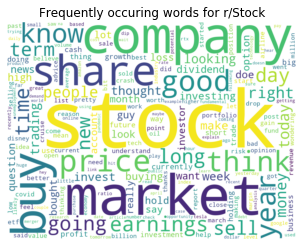

In [41]:
# Create a wordcloud to identify most frequently occuring words
stk_d = {} # fit dataframe into a two-dimensional dictionary
for a, x in stk_bag.values:
    stk_d[a] = x

wordcloud = WordCloud(width=1200, height=900, background_color='white',min_font_size=10)
wordcloud.generate_from_frequencies(frequencies=stk_d) # Our source from the created dictionary
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear") # Fit and interpolate the content within the specified width height parameters
plt.axis('off')
plt.title('Frequently occuring words for r/Stock')
plt.show()

**Takeaways**
- We can see that terms such as **stock, company, share, market and price** are commonly used in this subreddit
- Content primarily focuses on making profits and the right time to **buy**

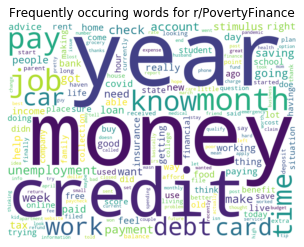

In [42]:
pov_d = {}
for a, x in pov_bag.values:
    pov_d[a] = x

wordcloud = WordCloud(width=1200, height=900, background_color='white',min_font_size=10)
wordcloud.generate_from_frequencies(frequencies=pov_d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Frequently occuring words for r/PovertyFinance')
plt.show()

**Takeaways**
- In contrast, r/PovertyFinance focuses a lot on **jobs, payment, credit and time**
- The subreddit focuses on clearing potential **loans and debts**, and the **time period** for this re-payment
- There is **little to no mention/advice** on investing in the **stock market**

#### Consensus on frequently occuring words

We would also like to dive deep into what the community thinks about the top words mentioned for both subreddits. We analyze three variables:

- **Number of upvotes**
- **Upvote ratio**
- **Number of comments**

**Upvotes** determine whether the community has found the words used in their respective subreddits to be reliable and in-line with the purpose of the subreddit.

While **comments** represent what is a hot topic for discussion when the respective words are mentioned in each post.

In [43]:
# Extract a new count vectorized dataframe of selftext but only include the top 10 words

stk_compare = pd.DataFrame(cvec.fit_transform(stk_df['selftext']).todense(), columns = cvec.get_feature_names())

In [44]:
top_stk_words = stk_bag.sort_values('sum',ascending=False)[:10]
top_stk_words = [x for x in top_stk_words['index']]
top_stk_words

['stock',
 'market',
 'company',
 'buy',
 'share',
 'price',
 'good',
 'think',
 'year',
 'know']

In [45]:
stk_compare = stk_compare[top_stk_words]

In [46]:
# Insert the number of upvotes, upvote ratio and comments for each post (each row)

stk_compare = stk_compare.join(stk_df['ups'])
stk_compare = stk_compare.join(stk_df['upvote_ratio'])
stk_compare = stk_compare.join(stk_df['num_comments'])

In [47]:
stk_compare.head()

,stock,market,company,buy,share,price,good,think,year,know,ups,upvote_ratio,num_comments
0,4,0,1,0,0,1,0,0,0,0,315.0,0.98,2393.0
1,3,4,0,0,2,0,0,0,0,0,11.0,0.78,106.0
2,0,0,0,0,0,0,0,0,0,0,316.0,0.95,99.0
3,0,2,0,0,0,0,0,0,0,0,1320.0,0.98,244.0
4,3,2,0,0,0,0,0,1,1,0,62.0,0.82,43.0


In [48]:
new_stk_bag = stk_bag.sort_values('sum',ascending=False)[:10]

In [49]:
# Create a for-loop to iterate through each row and column
# e.g. If post no. 1 has the word 'stock' mentioned, add the upvote
# compile the total number of upvotes with posts that contain the word 'stock'
# and divide the total upvotes by the total number of such posts to get
# the mean upvote

upvote_mean_list = []
for i in new_stk_bag['index']:
    count = 0
    store = 0
    for x in range(0,len(stk_compare['ups'])-1):
        if stk_compare[i][x] > 0:
            count += 1
            store += stk_compare['ups'][x]
        else:
            continue
    upvote_mean_list.append(store/count)

upvote_mean_list

[15.169811320754716,
 32.741176470588236,
 16.01948051948052,
 15.763636363636364,
 17.22695035460993,
 22.416666666666668,
 6.181818181818182,
 13.297101449275363,
 35.79661016949152,
 10.287878787878787]

In [50]:
# Apply the same for upvote ratio

upvoteratio_mean_list = []
for i in new_stk_bag['index']:
    count = 0
    store = 0
    for x in range(0,len(stk_compare['upvote_ratio'])-1):
        if stk_compare[i][x] > 0:
            count += 1
            store += stk_compare['upvote_ratio'][x]
        else:
            continue
    upvoteratio_mean_list.append(store/count)

In [51]:
# Apply the same for number of comments

comments_mean_list = []
for i in new_stk_bag['index']:
    count = 0
    store = 0
    for x in range(0,len(stk_compare['num_comments'])-1):
        if stk_compare[i][x] > 0:
            count += 1
            store += stk_compare['num_comments'][x]
        else:
            continue
    comments_mean_list.append(store/count)

In [52]:
# Put results back against a df with the top 10 words

new_stk_bag['upvote mean'] = upvote_mean_list
new_stk_bag['upvote ratio mean'] = upvoteratio_mean_list
new_stk_bag['comments mean'] = comments_mean_list

In [53]:
new_stk_bag

,index,sum,upvote mean,upvote ratio mean,comments mean
842,stock,845,15.169811,0.752948,24.841981
542,market,335,32.741176,0.742765,29.029412
168,company,280,16.019481,0.755649,29.558442
114,buy,241,15.763636,0.755818,19.660606
788,share,233,17.226950,0.816312,18.177305
668,price,216,22.416667,0.784667,39.341667
368,good,195,6.181818,0.760649,12.818182
887,think,181,13.297101,0.745072,19.376812
994,year,176,35.796610,0.767288,22.652542
477,know,164,10.287879,0.781364,13.174242


**Takeaways**
- For r/Stocks, we can see that **price** is a hot topic of discussion having the highest mean comments of 39, likely indicating discussions of buying and selling shares
- Upvote ratio is **consistent** among all 10 words indicating that all 10 words are well-received in the subreddit

In [54]:
# Repeat the same steps for r/PovertyFinance top 10 words

new_pov_bag = pov_bag.sort_values('sum',ascending=False)[:10]

pov_compare = pd.DataFrame(cvec.fit_transform(pov_df['selftext']).todense(), columns = cvec.get_feature_names())

top_pov_words = pov_bag.sort_values('sum',ascending=False)[:10]
top_pov_words = [x for x in top_pov_words['index']]

pov_compare = pov_compare[top_pov_words]

pov_compare = pov_compare.join(pov_df['ups'])
pov_compare = pov_compare.join(pov_df['upvote_ratio'])
pov_compare = pov_compare.join(pov_df['num_comments'])

new_pov_bag = pov_bag.sort_values('sum',ascending=False)[:10]

upvote_mean_list = []
for i in new_pov_bag['index']:
    count = 0
    store = 0
    for x in range(0,len(pov_compare['ups'])-1):
        if pov_compare[i][x] > 0:
            count += 1
            store += pov_compare['ups'][x]
        else:
            continue
    upvote_mean_list.append(store/count)

upvoteratio_mean_list = []
for i in new_pov_bag['index']:
    count = 0
    store = 0
    for x in range(0,len(pov_compare['upvote_ratio'])-1):
        if pov_compare[i][x] > 0:
            count += 1
            store += pov_compare['upvote_ratio'][x]
        else:
            continue
    upvoteratio_mean_list.append(store/count)    
    
comments_mean_list = []
for i in new_pov_bag['index']:
    count = 0
    store = 0
    for x in range(0,len(pov_compare['num_comments'])-1):
        if pov_compare[i][x] > 0:
            count += 1
            store += pov_compare['num_comments'][x]
        else:
            continue
    comments_mean_list.append(store/count)

new_pov_bag['upvote mean'] = upvote_mean_list
new_pov_bag['upvote ratio mean'] = upvoteratio_mean_list
new_pov_bag['comments mean'] = comments_mean_list

new_pov_bag

,index,sum,upvote mean,upvote ratio mean,comments mean
993,year,523,98.778169,0.814401,17.757042
572,money,513,71.825000,0.798964,18.782143
197,credit,504,115.082192,0.852968,14.374429
573,month,486,217.916350,0.826464,18.634981
465,job,450,69.686099,0.805695,17.488789
638,pay,440,85.880769,0.824808,17.134615
474,know,386,63.836653,0.813426,16.039841
907,time,370,126.991304,0.821739,21.091304
213,debt,369,176.128834,0.852822,25.877301
980,work,351,91.947368,0.799868,20.714912


**Takeaways**
- Compared to r/Stocks, there is a clear indicator of discussion within this subreddit
- **Debt** and **credit** appears to have the average collective **highest upvote mean of 100+ and upvote ratio of 85%+** which indicates that many readers and posters are likely seeking debt advice
- This is further supported by debt being the **highest mean comments of 25**
- The other top words are also generally well-received and the words have a relation to one another such as **credit, job, time and work**
- **Month** seems to be a hot topic as well with an upvote mean of 217, this could be related to posts talking about short-term debt clearance

#### Analysis on Bigram words

For our Bigram analysis, we will also be analysing the top 10 words, while comparing how frequent these topics are mentioned in the other subreddit

In [55]:
# Instantiate a new CountVectorizer with same parameters except for ngram_range

cvec = CountVectorizer(stop_words = new_stop_words, 
                       max_features=1000, 
                       tokenizer=LemmaTokenizer(),
                      strip_accents = 'unicode',
                      lowercase = True,
                      ngram_range=(2,2))

In [56]:
# Fit, transform and transpose the dataframe similar to the unigram analysis

stk_bi_cvec = pd.DataFrame(cvec.fit_transform(stk_df['selftext']).todense(), columns = cvec.get_feature_names())

In [57]:
pov_bi_cvec = pd.DataFrame(cvec.fit_transform(pov_df['selftext']).todense(), columns = cvec.get_feature_names())

In [58]:
stk_bi_cvec = stk_bi_cvec.transpose()
stk_bi_cvec['sum'] = stk_bi_cvec.sum(axis=1)
stk_bi_bag = stk_bi_cvec[['sum']]
stk_bi_bag.reset_index(inplace=True)

In [59]:
pov_bi_cvec = pov_bi_cvec.transpose()
pov_bi_cvec['sum'] = pov_bi_cvec.sum(axis=1)
pov_bi_bag = pov_bi_cvec[['sum']]
pov_bi_bag.reset_index(inplace=True)

In [60]:
stk_bi_top = stk_bi_bag.sort_values('sum',ascending=False)[:10]

In [61]:
pov_bi_top = pov_bi_bag.sort_values('sum',ascending=False)[:10]

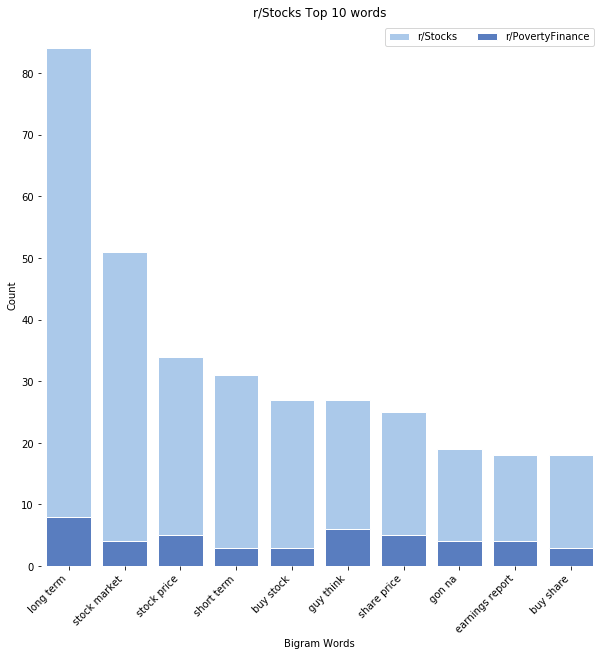

In [62]:
# Plot an overlapping barplot
# x-axis contains the top 10 bigram words for r/Stocks
# y-axis contains number of times bigram word is mentioned in subreddit
# We compare the number of times to both subreddits

f, ax = plt.subplots(figsize = (10,10))
sns.set_color_codes('pastel')
sns.barplot(x=stk_bi_top['index'], 
            y=stk_bi_top['sum'],
            label = 'r/Stocks', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x=stk_bi_top['index'], y=pov_bi_bag['sum'],
            label = 'r/PovertyFinance', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                  horizontalalignment='right')
ax.set_xlabel('Bigram Words')
ax.set_ylabel('Count')
ax.set_title('r/Stocks Top 10 words');
sns.despine(left = True, bottom = True)
plt.show()

**Takeaways**
- We can see that r/PovertyFinance does **not have many mentions of the stock market and buying shares**
- r/Stocks focuses a lot of **long-term** financial growth in the stock market compared to short-term growth

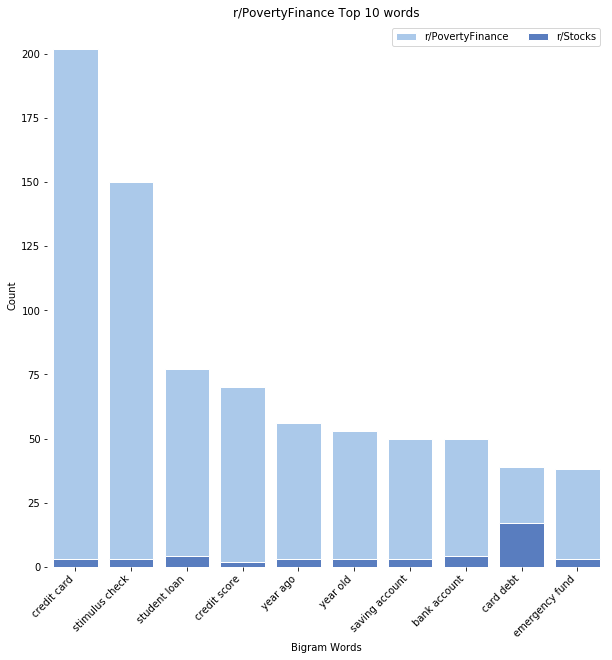

In [63]:
# Apply the same for r/PovertyFinance top 10 bigram words

f, ax = plt.subplots(figsize = (10,10))
sns.set_color_codes('pastel')
sns.barplot(x=pov_bi_top['index'], 
            y=pov_bi_top['sum'],
            label = 'r/PovertyFinance', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x=pov_bi_top['index'], y=stk_bi_bag['sum'],
            label = 'r/Stocks', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                  horizontalalignment='right')
ax.set_xlabel('Bigram Words')
ax.set_ylabel('Count')
ax.set_title('r/PovertyFinance Top 10 words');
sns.despine(left = True, bottom = True)
plt.show()

**Takeaways**
- The most mentioned bigram word in r/PovertyFinance is **credit card** which could indicate a discussion on credit card debt clearance
- **student loans, credit score and stimulus check** are also popular discussions for the subreddit
- r/Stocks barely has mentions of credit card and loans, which might indicate that r/Stock's community likely gives advice based on the assumption that the reader is clear of debt with the exception of card debt being mentioned in more than 10 posts

---

## Train/Test Split and Model Validation

We have decided to build **two** models for our testing:
- `LogisticRegression` (`lr`)

To attempt to identify whether there is a clear distinction between both subreddits

- Naive Bayes' `MultinomialNB` (`nb`)

Multinomial as the columns of `X` are all integer counts

#### Train/Test Split
Load our `X` and `y` variables with the subreddit post text and our binomial result

In [64]:
# We pass X as a series rather than a dataframe due to CountVectorizer's requirement

X = fin_df['selftext']
y = fin_df['stocks']

In [65]:
X.head()

0    httpswwwcnbccomteslasecuresmillionloanforshang...
1    httpswwwcnbccomjobsreportaprilhtmlhttpswwwcnbc...
2     remember  summerfall  there was  much volatil...
3      \n\nEven though the country  planning  reope...
4    Just looking  become familiar with more names ...
Name: selftext, dtype: object

Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [66]:
# Redefine training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [67]:
X_train.shape

(1226,)

In [68]:
X_test.shape

(604,)

In [69]:
y_test.value_counts(normalize=True)

0    0.541391
1    0.458609
Name: stocks, dtype: float64

#### Pipeline, GridSearch for LogisticRegression

EDIT HERE

In [70]:
# set up a pipeline with two stages:
# 1. CountVectorizer (transformer)
# 2. LogisticRegression (estimator)

pipe = Pipeline([
    ('cvec', CountVectorizer(tokenizer=LemmaTokenizer(),
                      strip_accents = 'unicode',
                      lowercase = True)),
    ('lr', LogisticRegression(solver='lbfgs', max_iter=200))
]
)

In [71]:
pipe.get_params()

{'memory': None,
 'steps': [('cvec',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                   lowercase=True, max_df=1.0, max_features=None, min_df=1,
                   ngram_range=(1, 1), preprocessor=None, stop_words=None,
                   strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
                   tokenizer=<__main__.LemmaTokenizer object at 0x0000014780959D48>,
                   vocabulary=None)),
  ('lr',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=200,
                      multi_class='warn', n_jobs=None, penalty='l2',
                      random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'cvec': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
   

#### Grid Search

In [72]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 250, 500, 1000, 2000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and 2-grams).

pipe_params = {
    'cvec__max_features': [250, 500, 1000, 2000],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)],
    'cvec__min_df': [2,3],
    'cvec__max_df': [0.9, 0.95],
    'cvec__stop_words': [new_stop_words]
}

In [73]:
# Instantiate GridSearchCV.

gs = GridSearchCV(pipe, 
                  param_grid=pipe_params,
                  n_jobs=-1,
                  verbose=True,
                  cv=5) # 5-fold cross-validation

In [74]:
# Fit our training data to the gridsearch parameters

gs.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [75]:
# Our best score appears to be performing well at 95% Accuracy, let's identify the best parameters

gs.best_score_

0.9567699836867863

In [76]:
# Our best parameters indicate the middle maximum number of features of 1,000
# With ngram range at (1, 1)
# and the max minimum occurence of 3

gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': ['become',
  'formerly',
  'his',
  'herself',
  'afterwards',
  'thereupon',
  'cannot',
  'two',
  'up',
  'interest',
  'well',
  'move',
  'off',
  'too',
  'wherever',
  'cant',
  'when',
  'top',
  'down',
  'un',
  'she',
  'which',
  'a',
  'bottom',
  'wherein',
  'fifteen',
  'mine',
  'side',
  'no',
  'whither',
  'toward',
  'nothing',
  'could',
  'your',
  'couldnt',
  'was',
  'own',
  'us',
  'through',
  'on',
  'me',
  'namely',
  'eight',
  'either',
  'hence',
  'hasnt',
  'still',
  'once',
  'yourself',
  'an',
  'anything',
  'everywhere',
  'forty',
  'thru',
  'our',
  'go',
  'over',
  'hereby',
  'fire',
  'since',
  'and',
  'yourselves',
  'whereafter',
  'it',
  'themselves',
  'several',
  'such',
  'get',
  'amongst',
  'each',
  'much',
  'how',
  'mostly',
  'part',
  'found',
  'neither',
  'anywhere',
  'would',
  'while',
  'see

In [77]:
# We'll use the best estimators for our model

gs_model = gs.best_estimator_

In [78]:

gs_model.score(X_train, y_train)

0.99836867862969

In [79]:
gs_model.score(X_test, y_test)

0.945364238410596

**Takeaways**

We noted that our train and test sets, despite doing **well above 90%**, may be **slightly overfitted**, we speculate this to be due to the `ngram_range` of
(1, 1) and will **decide to use (1, 2)** due to our unigram and bigram analysis in our EDA that terms such as **loan** and **credit card** would be key indicators of classification.

#### Fit and evaluate both Logistic Regression and Naive Bayes model with the best parameters

From our analysis, we will be identifying and analysing two key features within the `confusion_matrix`:

- *Precision* (**P**)

$P = {\frac{Tp}{Tp + Fp}}$

- *Recall* (**R**)

$R = {\frac{Tp}{Tp + Fn}}$

- Tp = correctly predicted as r/stocks
- Fp = wrongly predicted as r/stocks
- Tn = correctly predicted as r/povertyfinance
- Fn = wrongly predicted as r/povertyfinance

**P** helps us determine which posts have our model wrongly identified as r/stocks

While **R** helps us identify which posts our model wrongly identified as r/povertyfinance

In [80]:
# Instantiate CountVectorizer with the best parameters
cvec = CountVectorizer(stop_words=new_stop_words, 
                       max_df=0.9, 
                       min_df=2, 
                       max_features=2000, 
                       ngram_range=(1, 2),
                      tokenizer=LemmaTokenizer(),
                      strip_accents = 'unicode',
                      lowercase = True)

In [81]:
X_train_cvec = pd.DataFrame(X_train)

In [82]:
X_train_cvec = pd.DataFrame(cvec.fit_transform(X_train_cvec['selftext']).todense(), columns = cvec.get_feature_names())

In [83]:
X_train_cvec.shape

(1226, 2000)

In [84]:
X_test_cvec = pd.DataFrame(X_test)

In [85]:
X_test_cvec = pd.DataFrame(cvec.transform(X_test_cvec['selftext']).todense(), columns = cvec.get_feature_names())

In [86]:
X_test_cvec.shape

(604, 2000)

#### Logistic Regression model

In [87]:
# Instantiate our model

lr = LogisticRegression(solver='lbfgs')

In [88]:
# Fit model and predict

model2 = lr.fit(X_train_cvec, y_train)
predictions1 = lr.predict(X_test_cvec)

In [89]:
# Set up confusion matrix based on predictions and ravel for clarity

tn, fp, fn, tp = confusion_matrix(y_test, predictions1).ravel()

In [90]:
print("Logistic Regression Confusion Matrix")
print("")
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print("")
print("Precision: %s" % round((tp/(tp+fp)),2))
print("Recall: %s" % round((tp/(tp+fn)),2))

Logistic Regression Confusion Matrix

True Negatives: 317
False Positives: 10
False Negatives: 23
True Positives: 254

Precision: 0.96
Recall: 0.92


**Quick Takeaway**

- Our Logistic Regression Model has decent Precision and Recall results with 96% and 92% respectively
- We can deduce that we are more precise with predicting what belongs to r/stocks more accuractely than in r/povertyfinance
- We will evaluate the confusion matrix for the Naive Bayes model to decide which model to dive deeper into

#### Naive Bayes model

In [91]:
# Instantiate our model

nb = MultinomialNB()

In [92]:
# Fit our model with the best cvec parameters

model = nb.fit(X_train_cvec, y_train)

In [93]:
# Generate our predictions

predictions = nb.predict(X_test_cvec)

In [94]:
# Score our model on the training set.

nb.score(X_train_cvec, y_train)

0.9845024469820555

In [95]:
# Score our model on the testing set.

nb.score(X_test_cvec, y_test)

0.9685430463576159

In [96]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [97]:
print("Naive Bayes Confusion Matrix")
print("")
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print("")
print("Precision: %s" % round((tp/(tp+fp)),2))
print("Recall: %s" % round((tp/(tp+fn)),2))

Naive Bayes Confusion Matrix

True Negatives: 316
False Positives: 11
False Negatives: 8
True Positives: 269

Precision: 0.96
Recall: 0.97


**Quick Takeaway**
- The Naive Bayes model has a slightly higher accuracy for the test set data which indicates that the model is slightly less overfit compared to our Logistic Regression model
- This is likely due to certain overlapping words that our logistic regression is not able to distinguish as opposed to Naive Bayes' probablistic classifier method
- Since our Precision is similar and Recall is significantly higher than our Logistic Regression model by 5%, we will analyse which words are the main factor of the false positives/negatives in our Naive Bayes model (total 19 posts)

In [98]:
# Create a dataframe to compare actuals vs predictions

test_df = pd.DataFrame({'true_values': y_test,
                        'predictions':predictions})
test_df.reset_index(drop=True, inplace=True)
test_df.head()

,true_values,predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [99]:
X_test_cvec_nb = X_test_cvec

In [100]:
# Join predict and actuals to our vectorised words

X_test_cvec_nb = pd.concat([X_test_cvec_nb, test_df], axis=1)

In [101]:
# Identify our false positive/negative posts by locating actuals != predictions

false_positives = X_test_cvec_nb.loc[(X_test_cvec_nb['true_values'] == 0) & (X_test_cvec_nb['predictions'] == 1)]
false_negatives = X_test_cvec_nb.loc[(X_test_cvec_nb['true_values'] == 1) & (X_test_cvec_nb['predictions'] == 0)]

In [102]:
# Remove actual and prediction columns for our analysis

false_positives.drop(columns=['true_values', 'predictions'], inplace=True)
false_negatives.drop(columns=['true_values', 'predictions'], inplace=True)

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:
# Generate top 10 words for false_positives (Similar to our EDA)

false_positives = false_positives.transpose()
false_positives['sum'] = false_positives.sum(axis=1)
fp_bag = false_positives[['sum']]
fp_bag.reset_index(inplace=True)
fp_top = fp_bag.sort_values('sum',ascending=False)[:10]

# Generate for false_negatives as well

false_negatives = false_negatives.transpose()
false_negatives['sum'] = false_negatives.sum(axis=1)
fn_bag = false_negatives[['sum']]
fn_bag.reset_index(inplace=True)
fn_top = fn_bag.sort_values('sum',ascending=False)[:10]

In [104]:
# Predicted r/Stocks but actual is r/PovertyFinance

fp_top

,index,sum
1120,month,5
1011,looking,3
1821,tip,3
1989,year,3
1803,think,2
274,cheap,2
1901,use,2
1292,period,2
778,hand,2
118,bad,2


Our `false positive` words appear to reflect a lot on `month` and `year` which we assumed were heavy factors for r/PovertyFinance. However these posts in r/stocks addressed terms such as **cheap** which are words heavily used in r/PovertyFinance

In [105]:
# We predicted this as r/PovertyFinance but actual posts belong to r/stocks

fn_top

,index,sum
9,account,9
1114,money,5
1901,use,4
1566,security,4
448,deposit,4
606,fee,3
333,company,3
189,brokerage,3
739,got,3
1432,really,3


For our `false negatives`, it appears terms such as **security** and **deposit** were brought up which our model assumed to be an r/PovertyFinance quote. 

However, we assume this to be unusual as money into security deposits is **not related** to **stock market** discussion.

We will dive into one of the false positives to get an idea of the community's reaction to the post.

In [106]:
# Retrieve index rows of false positives and negatives

row_ids = X_test_cvec_nb[X_test_cvec_nb['true_values'] != X_test_cvec_nb['predictions']].index

In [107]:
# 11 fp + 8 fn

len(row_ids)

19

In [108]:
# Match the index from our row_ids to our final_df to get full information on the post

testrow_ids = X_test.index
incorrect_pred = fin_df.iloc[testrow_ids]
incorrect_pred.reset_index(drop=True, inplace=True)

In [109]:
incorrect_pred.columns

Index(['is_video', 'name', 'num_comments', 'oldtext', 'selftext', 'stickied',
       'subreddit', 'title', 'ups', 'upvote_ratio', 'stocks'],
      dtype='object')

In [110]:
# Taking a look at the text data for which our model classified as r/stocks
# but the actual is r/PovertyFinance

print('False Positive Index 300, text data :')

incorrect_pred.iloc[300,4]

False Positive Index 300, text data :


'gogglesu lures you  with their cheap pricing but what they don tell you  all  they are producing them  China and  takes over  month  arrive OVER  MONTH None  this  disclosed  you before and during ordering  you can wait  month this may  worth  but any shorter period than that you better off ordering from somewhere else you looking for cheap glasses from gogglesucom  aware  their extremely long shipping period'

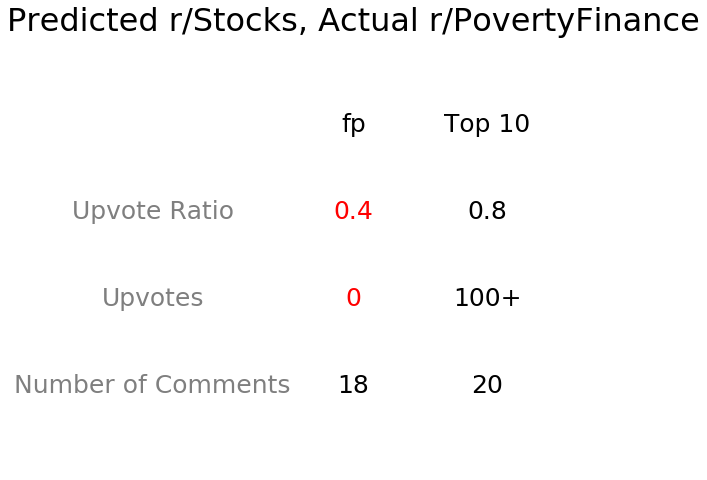

In [111]:
plt.figure(figsize=(12, 8))
plt.text(x = 0.5,                              
         y = 0.6,                              
         s = incorrect_pred.iloc[300,9], # Upvote Ratio
         ha = 'center',                        
         va = 'center',                        
         size = 25,                            
         alpha = 1,
        c='red')
plt.text(x = 0.2,                              
         y = 0.6,                              
         s = 'Upvote Ratio',
         ha = 'center',                        
         va = 'center',                        
         size = 25,                            
         alpha = 0.5)
plt.text(x = 0.5,                              
         y = 0.2,                              
         s = incorrect_pred.iloc[300,2], # Number of comments
         ha = 'center',                        
         va = 'center',                        
         size = 25,                            
         alpha = 1)
plt.text(x = 0.2,                              
         y = 0.2,                              
         s = 'Number of Comments',
         ha = 'center',                        
         va = 'center',                        
         size = 25,                            
         alpha = 0.5)
plt.text(x = 0.5,                              
         y = 0.4,                              
         s = incorrect_pred.iloc[300,8], # Number of Upvotes
         ha = 'center',                        
         va = 'center',                        
         size = 25,                            
         alpha = 1,
        c='red')
plt.text(x = 0.2,                              
         y = 0.4,                              
         s = 'Upvotes',
         ha = 'center',                        
         va = 'center',                        
         size = 25,                            
         alpha = 0.5)
plt.text(x = 0.7,                              
         y = 0.6,                              
         s = 0.8, # r/PovertyFinance average upvote ratio (top words)
         ha = 'center',                        
         va = 'center',                        
         size = 25,                            
         alpha = 1)
plt.text(x = 0.7,                              
         y = 0.4,                              
         s = '100+', # r/PovertyFinance average number of upvotes (top words)
         ha = 'center',                        
         va = 'center',                        
         size = 25,                            
         alpha = 1)
plt.text(x = 0.7,                              
         y = 0.2,                              
         s = 20, # r/PovertyFinance average comments (top words)
         ha = 'center',                        
         va = 'center',                        
         size = 25,                            
         alpha = 1)
plt.text(x = 0.5,                              
         y = 0.8,                              
         s = 'fp',
         ha = 'center',                        
         va = 'center',                        
         size = 25,                            
         alpha = 1)
plt.text(x = 0.7,                              
         y = 0.8,                              
         s = 'Top 10',
         ha = 'center',                        
         va = 'center',                        
         size = 25,                            
         alpha = 1)
plt.title('Predicted r/Stocks, Actual r/PovertyFinance',size=32,)
plt.axis('off');

**Takeaways**
- Based on the textual data of our false positive (fp), it appears to be a rant post that may not provide useful information regarding cost savings related to r/PovertyFinance
- Our infographic above shows that this may be a controversal post due to it's **low upvote ratio and upvotes** compared to our average top 10 words
- As we are looking to **allocate posts that is suitable** for the respective subreddits, some of these wrongly classified posts may actually be posts **not relevant to the subreddit** (hence the low upvote ratio)
- Based on focused topics (Such as stock market investment and credit card management), this post may not be relevant to both subreddits
- We will assume that our false positives and false negatives may be posts that do not contain context related to both subreddits' purpose

#### ROC AUC Score

We will plot an ROC and AUC graph to summarise our Naive Bayes model results

In [112]:
# Import roc_auc_score.
from sklearn.metrics import roc_auc_score

In [113]:
# Create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in nb.predict_proba(X_test_cvec)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [114]:
# Calculate ROC AUC

roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.9947780390598262

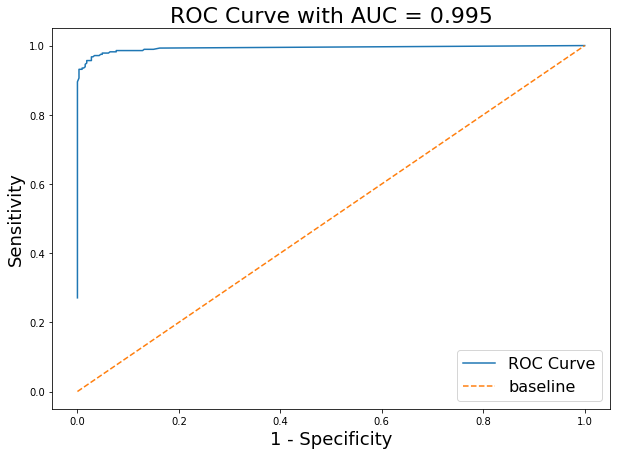

In [115]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

#### Quick Takeaway
- True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity) is fairly accurate with both being close to 1

---

## Conclusion

#### Key Takeaways

- Our model is able to allocate majority posts into the correct subreddit with a **high accuracy of 96.8%** for our test data
- **r/Stocks** are infuenced by discussions about **market prices and popular companies**
- **r/PovertyFinance** revolves around discussion about **credit card management and loan repayments**
- This will help push **newcomers** into the right direction to **seek appropriate financial advice** based on their **financial position** (positive vs negative net asset position)
- False positives and negatives tend to be unpopular or unrelated posts to the subreddit

#### Limitations

- Certain terms such as **year** and **month** are both mentioned in both subreddits often and we may include them in our **stopwords** for future upgrades
- We have not included a **weightage** on certain words that are similar but have different meaning (e.g. stock broker **account** for r/Stocks and savings **account** for r/PovertyFinance)
- Our model is built on all posts in each subreddit, however many of these posts may not be relevant. We could create a dataset where it only contains posts with high upvote ratio/comments but we may have insufficient data to work on